# Markov Chain Monte Carlo

### Question 1
As per the schemes of a Gibbs sampler, the setup proceeds by defining the transition probabilities of a Markov Chain. Assume the $n$-th step distribution is $p_{n}$, then:

\begin{equation}
p_{n}(x)=\int P(x,y)p_{n-1}(y) dy
\end{equation}
Where $P(y,x)$ is the transition probability given for the Gibbs sampler. For example assuming we have three variables $(X,Y,Z)$. Then:
\begin{align}
p_{n+1}(X_1,Y_1,Z_1)&=\int p_{n}(X_0,Y_0,Z_0)P(X_1,Y_1,Z_1 \mid X_0, Y_0,Z_0) \\
&=\int p_{n}(Y_0,Z_0)\pi(X_1 \mid Y_0, Z_0)\pi(Y_1 \mid X_1, Z_0)\pi(Z_1 \mid X_1, Y_1)
\end{align}
Note the $X_{0}$ factors out due to integration over the whole space.
Thus if the distribution at time $n$ was $\pi$, then:
\begin{align}
p_{n+1}(X_1,Y_1,Z_1)&=\int \pi(Y_0,Z_0)\pi(X_1 \mid Y_0, Z_0)\pi(Y_1 \mid X_1, Z_0)\pi(Z_1 \mid X_1, Y_1) \\
&=\int \pi(X_1 , Y_0, Z_0)\pi(Y_1 \mid X_1, Z_0)\pi(Z_1 \mid X_1, Y_1) \\
&=\int \pi(Y_0 \mid X_1, Z_0)\pi(X_1, Z_0)\pi(Y_1 \mid X_1, Z_0)\pi(Z_1 \mid X_1, Y_1) \\
&=\int \pi(Y_0 \mid X_1, Z_0)\pi(Y_1 , X_1, Z_0)\pi(Z_1 \mid X_1, Y_1) \\
&=\int \pi(Y_0 \mid X_1, Z_0)\pi(Z_0 \mid Y_1 , X_1)\pi(Z_1, X_1, Y_1) \\
&=\int \pi(Z_0 \mid Y_1 , X_1)\pi(Z_1, X_1, Y_1) \\
&=\pi(Z_1, X_1, Y_1)
\end{align}
Proving that $\pi$ is the invariant distribution, thus our Gibbs Sampler will converge in distribution to $\pi$ by the Ergodic theorem.

#### Football Data
Data from the performance of K football teams, over T years has been scored on a scale of 0 (no wins) to 114 (win in all 38 games), with a win scoring three and a draw scoring one point. Let us model $Y_{k,t}$, the score of the kth team in year $t$, as:
\begin{equation}
Y_{k,t}|parameters \sim N(μ_k,σ_{k}^2) \quad \text{for}  \quad k = 1,...,K \quad \text{and} \quad t = 1,...,T
\end{equation}
with the hierarchical prior structure that the team mean $μ_k$ and variance $σ_{k}^{2}$ are independently
distributed, given $\theta$, as
\begin{align}
μ_k|\theta &\sim N(\theta,\sigma_{0}^2) \\
σ^2 &\sim Γ(α, β) 
\end{align}

where $σ_0^2$, $α$ and $β$ are known parameters, and $θ$ is a second-stage prior with distribution $θ \sim N(μ_0, τ_0^2)$,
where $μ_0$ and $τ_0^2$ are known parameters.
The Gibbs sampler is well suited to the analysis of hierarchical models, since the full one- dimensional conditional distributions often have extremely simple forms. For example, in the above model
\begin{equation}
μ_k \mid \textbf{μ}_{-k} ,θ,σ^2,y \sim N \Big(\frac{σ_{k}^{−2} \sum_{t=1}^{T} y_{k,t} + θσ_{0}^{−2}}{Tσ_{k}^{−2} + σ_{0}^{−2}},\frac{1}{Tσ_{k}^{−2} + σ_{0}^{−2}}\Big)
\end{equation}
\begin{equation}
θ \mid μ ,σ^2,y \sim N\Big(\frac{σ_{0}^{−2} \sum_{k=1}^{K} \mu_{k} + μτ_{0}^{−2}}{Kσ_{0}^{−2} + \tau_{0}^{−2}},\frac{1}{Kσ_{0}^{−2} + \tau_{0}^{−2}}\Big)
\end{equation}

\begin{equation}
\sigma_k^{-2} \mid \textbf{σ}_{-k}^{2}, \mu,θ,y \sim \Gamma \Big(α +\frac{T}{2}, β + \frac{1}{2}\sum_{t=1}^{T} (y_{k,t} −μ_{k})^2 \Big)
\end{equation}

### Question 2
Let's verify the above formulas, first note it should be clear that for each team, the parameters specific for each team $\mu_{k},\sigma_{k}, y_{k,t}$ are independent of the other teams $k'$ given $\theta$. Also note the full joint density is (up to a constant):
\begin{equation}
p(y, \mu, \theta, \sigma^{2}) = \sigma_{0}^{-K} \tau_{0}^{-1}\exp(-\frac{(\theta-\mu_0)^2}{2\tau_{0}^2}
-\frac{\sum_{k=1}^K(\mu_k-\theta)^2}{2\sigma_{0}^2}
-\frac{\sum_{k,t}(y_{k,t}-\mu_k)^2}{2\sigma_{k}^2})
 \prod_{k=1}^K \sigma_{k}^{-T} \sigma_{k}^{-2(\alpha-1)} \exp(-\beta \sigma_{k}^{-2})
\end{equation}
Thus can read of the relevant distributions from two facts:
 - If $p(x) \propto \exp(-ax^2+bx)$ then $x \sim N(\frac{b}{2a},\frac{1}{2a})$ provided a is positive
 - If $p(x) \propto x^A \exp(-Bx)$ then $x \sim \Gamma(A+1,B)$ provided $B$ is positive and $A$ is greater than -1.
 
The conditional distribution can hence be derived by expanding and following the above steps.

The marginal distribution of $\mu$ can be computed by considering the characteristic function:
\begin{align}
\mathbb{E}(\exp(it\mu))&=\mathbb{E}(\mathbb{E}(\exp(it\mu) \mid \theta) ) \\
&=\mathbb{E}(\exp(it\theta-\frac{1}{2}\sigma_0^{2}t^2) ) \\
&=\mathbb{E}(\exp(it\mu_0-\frac{1}{2}\tau_0^{2}t^2-\frac{1}{2}\sigma_0^{2}t^2) )
\end{align}
Thus we can conclude that:
\begin{equation}
\mu \sim N(\mu_0,\sigma_0^{2}+\tau_0^{2})
\end{equation}
Can verify via some quick sampling:

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        5.000e+00, 1.300e+01, 1.900e+01, 4.200e+01, 7.300e+01, 1.650e+02,
        2.300e+02, 4.480e+02, 6.920e+02, 9.880e+02, 1.593e+03, 2.238e+03,
        2.942e+03, 3.789e+03, 4.944e+03, 5.677e+03, 6.693e+03, 7.493e+03,
        7.868e+03, 7.997e+03, 7.869e+03, 7.427e+03, 6.713e+03, 5.894e+03,
        4.897e+03, 3.842e+03, 2.974e+03, 2.184e+03, 1.519e+03, 1.078e+03,
        6.940e+02, 4.320e+02, 2.400e+02, 1.530e+02, 8.200e+01, 3.500e+01,
        3.600e+01, 1.300e+01, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

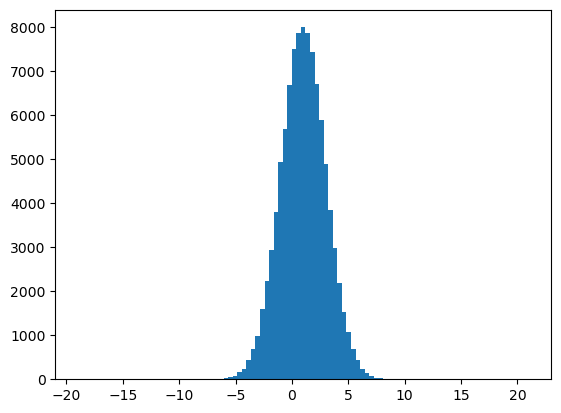

In [28]:
import numpy as np
import matplotlib.pyplot as plt
bins=np.linspace(-19,21,100)
a=np.random.normal(1,2, size=100000)
plt.hist(a,bins=bins)

As a normal with mean 1 and scale 2, can see most of the points lie in 2 standard deviations

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 7.000e+00,
        3.000e+00, 1.300e+01, 3.300e+01, 3.600e+01, 5.600e+01, 5.500e+01,
        1.090e+02, 1.280e+02, 1.720e+02, 2.340e+02, 2.800e+02, 3.570e+02,
        4.480e+02, 5.570e+02, 7.940e+02, 9.070e+02, 1.064e+03, 1.284e+03,
        1.518e+03, 1.805e+03, 2.073e+03, 2.415e+03, 2.711e+03, 3.035e+03,
        3.288e+03, 3.493e+03, 3.863e+03, 4.041e+03, 4.207e+03, 4.385e+03,
        4.500e+03, 4.339e+03, 4.410e+03, 4.435e+03, 4.169e+03, 4.064e+03,
        3.786e+03, 3.518e+03, 3.334e+03, 3.028e+03, 2.643e+03, 2.360e+03,
        2.103e+03, 1.803e+03, 1.528e+03, 1.298e+03, 1.133e+03, 9.230e+02,
        7.620e+02, 5.830e+02, 4.470e+02, 3.430e+02, 3.090e+02, 1.960e+02,
        1.770e+02, 1.280e+02, 9.300e+01, 5.500e+01, 4.700e+01, 3.400e+01,
        2.500e+01, 1.100e+01, 1.100e+0

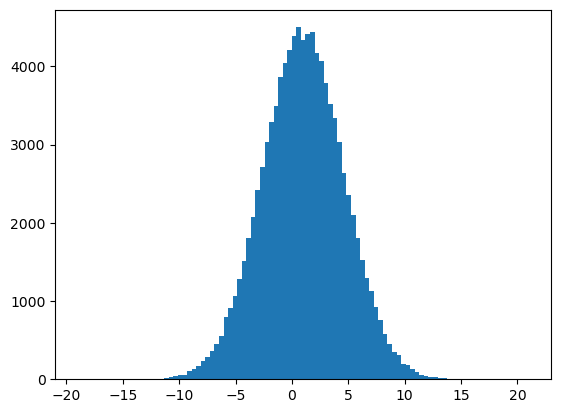

In [29]:
b=np.random.normal(a,3)
plt.hist(b,bins=bins)

### Question 3

In [334]:
import numpy as np 

class Footd:
    
    def __init__(self,K,T):
        self.T=T
        self.K=K

class Gibbs:
    
    def __init__(self,n,distributions,priors=None,x0=None):
        self.n=n
        self.dist=distributions
        self.X=None
        if priors:
            self.priors=priors
            self.generate=True
        else:
            self.generate=False
            self.x0=x0
        self.masks=[i for i in range(self.n)]

        for k in range(self.n):
            mask=np.concatenate([np.ones(k, dtype=int),np.zeros(self.n-k,dtype=int)])
            self.masks[k]=mask
    
    def sample(self, size):
        ind=np.arange(self.n,dtype=int)
        X=np.zeros((size+1,self.n))
        if self.generate:
            for i in range(self.n):
                X[0,i]=(self.priors[i]).generate()
        else:
            X[0,:]=self.x0
        for i in range(0,size):
            for k in range(self.n):
                mask=self.masks[k]+i*np.ones(self.n, dtype=int)
                X[i+1,k]=self.dist[k].generate(X[mask,ind])
        self.X=X
        return X
    
    def cycle(self,M):
            self.x0=self.sample(M)[-1,:]
            
            

Will assume the ordering goes theta, mu1,...,muK, sigma1,....,sigmaK, y1,1,...,y1,T,...,yK,T, giving a total of KT+2K+1 points per generation

In [31]:
import pandas as pd
data=pd.read_csv('football.csv')

In [32]:
data

,Team,2024,2023,2022,2021,2020
0,Arsnal,83,90,78,87,81
1,Asten Villa,47,56,45,50,60
2,Blackborn Rovers,42,44,60,46,56
3,Boltin Wandrers,58,53,44,40,60
4,Charlston Athletic,46,53,49,44,45
5,Chelsea Buns,95,79,67,64,71
6,Evraton,61,39,59,43,46
7,Fullem,44,52,48,44,53
8,Livurpule,58,60,64,80,54
9,Manchester Ununited,77,75,83,77,70


In [33]:
K=data.shape[0]
T=data.shape[1]-1
print(K,T)

14 5


In [177]:
class Gamma(Footd):
    ## note generates 1/sigˆ2
    def __init__(self,i,K=4,T=5,a=10**(-5),b=10**(-3)):
        Footd.__init__(self,K=K,T=T)
        self.tag=i
        self.a=a
        self.b=b
    
    def generate(self, x):
        shape=self.T/2+self.a
        indmu=1+self.tag
        sq=(x[(1+2*self.K+self.tag*self.T):(1+2*self.K+indmu*self.T)]-x[indmu])**2
        rate=self.b+0.5*sq.sum()
        return np.random.gamma(shape,1/rate)

class TNorm(Footd):
    def __init__(self,K=4,T=5,m=60,s=10,t=20):
        Footd.__init__(self,K=K,T=T)
        self.s=s
        self.t=t
        self.m=m
        
    def generate(self,x):
        var=1/(self.K/self.s**2+1/self.t**2)
        ss=(self.m/self.t**2)+x[1:1+self.K].sum()/self.s**2
        mean=ss*var
        return np.random.normal(mean,np.sqrt(var))
    
class MNorm(Footd):
    def __init__(self,i,K=4,T=5,m=60,s=10):
        Footd.__init__(self,K=K,T=T)
        self.s=s
        self.tag=i

    def generate(self,x):
        y=x[(1+2*self.K+self.tag*self.T):(1+2*self.K+self.tag*self.T)+self.T].sum()
        se=np.sqrt(1/(self.T*x[1+K+self.tag]+1/self.s**2))
        mean=(x[1+K+self.tag]*y+x[0]/self.s**2)*se**2
        return np.random.normal(mean,se)

class yNorm(Footd):
    def __init__(self,i,K=4,T=5):
        Footd.__init__(self,K=K,T=T)
        self.tag=i

    def generate(self,x):
        se=1/np.sqrt(x[1+self.K+self.tag])
        mean=x[1+self.tag]
        return np.random.normal(mean,se)
    
class con:
    def __init__(self,C):
        self.C=C
        
    def generate(self,*args,**kwargs):
        return self.C
    
class pGamma:
    def __init__(self,a,b):
        self.a=a
        self.b=b
        
    def generate(self):
        return np.random.gamma(self.a,1/self.b)
class pNorm:
    def __init__(self,m,s):
        self.m=m
        self.s=s
        
    def generate(self):
        return np.random.normal(self.m,np.sqrt(self.s))

Need to make a decision here regarding the initial states. Can observe that $\mu_0=60$ should be close to the sample mean, within $2*20$ specifically. This matches the data given:

In [35]:
data.iloc[:,1:].to_numpy().mean()

57.41428571428571

The value of $\sigma_0^2=100$ describes the spread of the means $\mu_k$ across the teams:.

In [36]:
data.iloc[:,1:].to_numpy().mean(axis=1)

array([83.8, 51.6, 49.6, 51. , 47.4, 75.2, 49.6, 48.2, 63.2, 76.4, 49.6,
       60.8, 46.2, 51.2])

In [37]:
data.iloc[:,1:].to_numpy().mean(axis=1).var()

144.68836734693878

Next note $\sigma_{k}^{-2}$ describes the spread of each team across years. They should have mean $\alpha_0/\beta_0=1/100$ and variance $\alpha_0/\beta_0^2=10$. However note the distribution of $\Gamma(\alpha_0,\beta_0)$ is quite badly behaved.

In [38]:
suv=1/data.iloc[:,1:].to_numpy().var(axis=1)
print(suv,suv.mean(),suv.std()**2)

[0.05506608 0.03180662 0.01990446 0.01644737 0.09398496 0.00810636
 0.01291322 0.06868132 0.01235178 0.05733945 0.09057971 0.01027116
 0.0158831  0.04863813] 0.03871240795052894 0.0008486279427531584


In [45]:
from scipy.stats import gamma
G1=gamma(a = 10**(-5), scale = 10**3)
samp=G1.rvs(10000)
print(samp.mean(),samp.var())

0.003450276870916013 0.11315001956104989


In [44]:
G1.rvs(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Can see if you generated 10000 samples it would be a pretty terrible sample regardless, and the sample mean and variances are not close to converging. Not only that, most of the values generated are rounded to 0 due to being too small, which is definitely an issue since this value is the inverse of a variance and has to be positive to be well-defined.

With the above discussion in mind, we can't just generate a $\sigma_0$ and thus must choose a fixed value. Ultimately it was decided to just use the sample approximations:


In [58]:
def Football(data, s=10, a=10**(-5),b=10**(-3),mu=60,t=20):
    X0=data.iloc[:,1:].to_numpy()
    K=X0.shape[0]
    T=X0.shape[1]
    dist=[TNorm(K=K,T=T,m=mu,s=s,t=t)]
    x0=[X0.mean()]
    for i in range(K):
        dist.append(MNorm(i=i,K=K,T=T,m=mu,s=s))
        x0.append(X0.mean(axis=1)[i])
    for i in range(K):
        dist.append(Gamma(i=i,K=K,T=T,a=a,b=b))
        x0.append(1/X0.var(axis=1)[i])
    for i in range(K):
        for j in range(T):
            dist.append(yNorm(i=i,K=K,T=T))
            x0.append(X0[i,j])

    return Gibbs(1+2*K+K*T,dist,x0=x0)
    

In [66]:
test=Football(data)
test.sample(10000).mean(axis=0)

array([ 6.06647904e+01,  6.04955016e+01,  6.11424593e+01,  6.05743695e+01,
        6.01527711e+01,  6.20618101e+01,  6.03277081e+01,  6.05707201e+01,
        6.02313933e+01,  5.99716027e+01,  6.07041407e+01,  6.12852504e+01,
        6.07604032e+01,  6.04744394e+01,  6.05894043e+01,  4.58118766e-01,
        1.05649742e+01,  2.71454733e+01,  6.15584770e+00,  4.81487867e+01,
        2.78163372e+01,  9.30797155e+00,  2.89025595e+01,  2.02648429e+01,
        1.85487801e+01,  2.23018103e+01,  2.78145281e-02,  1.86070177e+00,
        9.79556333e+00, -1.59871540e+33,  3.95566461e+33,  3.72490377e+33,
       -2.55081740e+33,  1.23201818e+33,  2.38631621e+28, -5.30170344e+27,
        1.75819371e+28, -1.88998520e+28,  1.22154824e+28, -1.43725513e+19,
       -1.40388757e+18,  3.52144226e+19, -2.76385595e+19, -1.77526428e+19,
       -5.80343651e+25,  2.04276402e+25,  3.71881145e+25, -1.52978498e+25,
       -2.28387760e+25,  2.09937130e+07, -1.66840996e+06,  2.12365592e+06,
        7.58221291e+06, -

## Posterior estimation
Similar to above but limit instead to only generating $\theta,\sigma$ and $\mu$ given y. Again ordering theta, mu1,...,muK, sigma1,....,sigmaK

In [176]:
class PostFd(Footd):
    def __init__(self,y,K=4,T=5):
        Footd.__init__(self,K=K,T=T)
        self.y=y



class GammaFd(PostFd):
    ## note generates 1/sigˆ2
    def __init__(self,i,y,K=4,T=5,a=10**(-5),b=10**(-3)):
        PostFd.__init__(self,y,K=K,T=T)
        self.tag=i
        self.a=a
        self.b=b
    
    def generate(self, x):
        shape=self.T/2+self.a
        indmu=1+self.tag
        sq=(self.y[self.tag*self.T:indmu*self.T]-x[indmu])**2
        rate=self.b+sq.sum()/2
        self.shape=shape
        self.rate=rate
        return np.random.gamma(shape,1/rate)
    
class MNormFd(PostFd):
    def __init__(self,i,y,K=4,T=5,s=10):
        PostFd.__init__(self,y,K=K,T=T)
        self.s=s
        self.tag=i

    def generate(self,x):
        y=self.y[self.tag*self.T:self.tag*self.T+self.T].sum()
        se=np.sqrt(1/(self.T*x[1+K+self.tag]+1/self.s**2))
        mean=(x[1+K+self.tag]*y+x[0]/self.s**2)*se**2
        self.mean=mean
        self.se=se
        return np.random.normal(mean,se)

In [322]:
def FootPost(data, s=10, a=10**(-5),b=10**(-3),mu=60,t=20, x0=None):
    try:
        X0=data.iloc[:,1:].to_numpy()
    except:
        X0=data[:,1:]
    K=X0.shape[0]
    T=X0.shape[1]
    dist=[TNorm(K=K,T=T,m=mu,s=s,t=t)]
    y=X0.flatten()
    bo=not x0
    if bo:
        x0=[y.mean()]
    
    for i in range(K):
        dist.append(MNormFd(i=i,y=y,K=K,T=T,s=s))
        if bo:
            x0.append(X0.mean(axis=1)[i])
    for i in range(K):
        dist.append(GammaFd(i=i,y=y,K=K,T=T,a=a,b=b))
        if bo:
            x0.append(1/X0.var(axis=1)[i])

    return Gibbs(1+2*K,dist,x0=x0)
    

In [185]:
test=FootPost(data)
samples=test.sample(10000)

### Question 4
Let's obtain a posterior estimate for $\theta \mid y$ (note initial state). Note for the histogram we choose to play around with the bin sizes starting with $\sqrt{n}$, trimming down when its too noisy and up when not sufficiently smooth visually

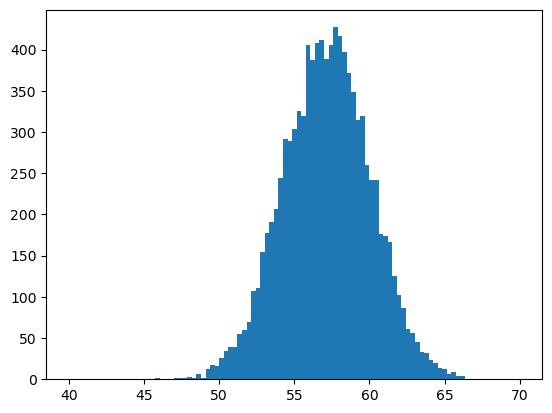

57.41428571428571


In [197]:
plt.hist(samples[:,0],bins=np.linspace(40,70,100))
plt.show()
print(test.x0[0])

Likewise for $\mu_1 \mid y$ 

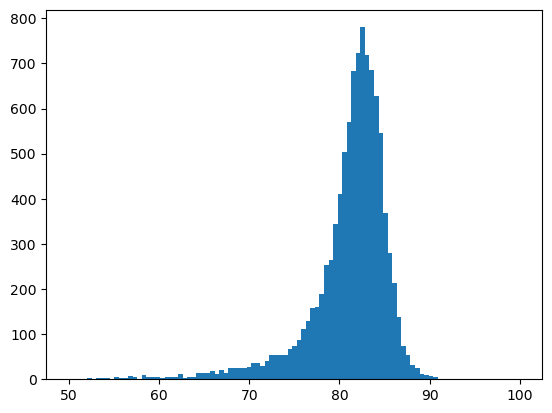

83.8


In [198]:
plt.hist(samples[:,1],bins=np.linspace(50,100, 100))
plt.show()
print(test.x0[1])

We can estimate the various posterior means now using:

In [202]:
print(samples.mean(axis=0)[0:1+test.dist[0].K])

[57.15776079 81.06442653 52.29395046 50.70036142 52.15079219 47.83731542
 69.24670564 51.31356176 48.71025284 61.80551044 74.77347509 49.97212175
 59.96366581 48.32813404 51.69029221]


In [207]:
(1/samples).mean(axis=0)

array([1.75402907e-02, 1.23810000e-02, 1.92038742e-02, 1.98567969e-02,
       1.93085460e-02, 2.09459663e-02, 1.45857922e-02, 1.96557292e-02,
       2.05814730e-02, 1.62895910e-02, 1.34054214e-02, 2.00505417e-02,
       1.67995483e-02, 2.08883932e-02, 1.94045003e-02, 7.95069748e+01,
       7.41819807e+01, 1.13476212e+02, 1.34354603e+02, 2.53195136e+01,
       3.38228691e+02, 1.72151628e+02, 3.45393746e+01, 1.82323345e+02,
       5.49142090e+01, 2.65247048e+01, 2.03118845e+02, 1.49522604e+02,
       4.81385222e+01])

In [204]:
print((1/samples).mean(axis=0)[1+test.dist[0].K:])

[ 79.50697485  74.18198066 113.47621153 134.35460297  25.31951363
 338.22869139 172.15162755  34.53937459 182.32334537  54.91420901
  26.5247048  203.11884456 149.52260357  48.13852224]


In [205]:
print(1/(samples.mean(axis=0)[1+test.dist[0].K:]))

[ 26.01033534  38.33652217  60.99161644  73.360676    13.10826406
 166.21640538  94.23211425  17.98013673  98.23734902  23.26349569
  13.6814884  114.9312735   78.28134062  25.37735689]


The last part here is just to show that we can't get an estimate for the posterior mean of $\sigma_{k}^2$ just by taking the reciprocal of the posterior mean of $\sigma_{k}^{-2}$. In fact we have had to secretly use the fact that if $X_i$ is ergodic Markov then $\phi(X_{i})$ must also be ergodic Markov and the invariant distribution is precisely $\phi(X)$ where $X$ is distributed according to the invariant distribution of $X_{i}$. This little fact follows from the fact that:
\begin{equation}
\int_{C} J_{\phi} (X) f(\phi(X))dX = \int_{\phi(C)} f(X)dX
\end{equation}
For any measurable f and $C^1$ diffeomorphism $\phi$. From this it is easy to derive the following relations:
\begin{align}
\int_{C \times C'} J_{\phi_1} J_{\phi_2} (X) f(\phi_1(X),\phi_2(Y))dXdY &= \int_{\phi_1(C)\times \phi_2(C')} f(X,Y)dXdY \\
p_{\phi(X)}(u) &= p_{X}(\phi^{-1}(u)) J_{\phi{-1}}(u) \\
\pi_{\phi(X)}(u) &= \pi_{X}(\phi^{-1}(u)) J_{\phi{-1}}(u) \\
p_{\phi_{1}(X)\mid \phi_{2}(Y)}(u \mid v) &= p_{X \mid Y}(\phi^{-1}(u) \mid \phi_{2}^{-1}(v)) J_{\phi_1{-1}}(u)
\end{align}
Alternatively just apply ergodic theorem to $f \circ \phi$ if the only result we are interested in is estimating the expected value.

### Question 5

We can obtain a posterior estimate to $\mathbb{P}(\mu_{1} > \theta \mid y)$ by just integrating the indicator:

In [213]:
boo=(samples[:,0]<samples[:,1])
print(boo.sum(0)/len(boo))

0.9978002199780022


In [219]:
boo=(samples[:,0]<samples[:,4])
print(boo.sum(0)/len(boo))

0.14588541145885411


### Question 6

Let's analyze the convergence of the algorithm by considering variances for various sample sizes

In [250]:
def samp(N,size,data):
    sampler=FootPost(data)
    res=np.zeros((N,2))
    for i in range(N):
        samples=sampler.sample(size)
        res[i,0]=samples.mean(axis=0)[1]
        boo=(samples[:,0]<samples[:,1])
        res[i,1]=boo.sum()/len(boo)
    return res

In [266]:
res=[]
for i in range(10):
    res.append(samp(100,i*100,data).var(axis=0))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [229]:
t.var(axis=0)

array([3.32908573e-02, 5.07983525e-06])

In [238]:
import pandas as pd

x = np.array([5, 2, 2, 5, 3, 5, 2, 5, 4, 2])

pd.Series(x).expanding().var(ddof=0).to_numpy()

array([0.        , 2.25      , 2.        , 2.25      , 1.84      ,
       1.88888889, 1.95918367, 1.984375  , 1.77777778, 1.85      ])

In [239]:
pd.Series(x).rolling(window=len(x), min_periods=1).var(ddof=0)

0    0.000000
1    2.250000
2    2.000000
3    2.250000
4    1.840000
5    1.888889
6    1.959184
7    1.984375
8    1.777778
9    1.850000
dtype: float64

In [243]:
pd.DataFrame(t).rolling(window=len(x), min_periods=1,axis=0).var(ddof=0)

,0,1
0,0.000000,0.000000
1,0.029291,0.000009
2,0.020282,0.000010
3,0.027452,0.000010
4,0.036433,0.000009
5,0.032579,0.000007
6,0.027928,0.000007
7,0.029104,0.000006
8,0.036593,0.000006
9,0.033291,0.000005


In [258]:
import time
t1=time.time()
ss=FootPost(data).sample(1000)
ss.mean(axis=0)[1]
(ss[:,0]<ss[:,1])
print(time.time()-t1)


0.4469108581542969


In [267]:
variances=np.array(res)

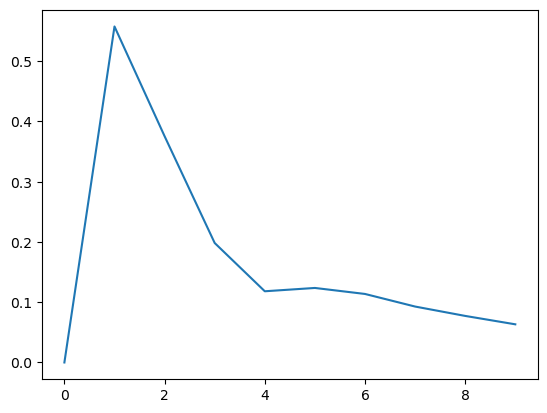

In [268]:
plt.plot(variances[:,0])

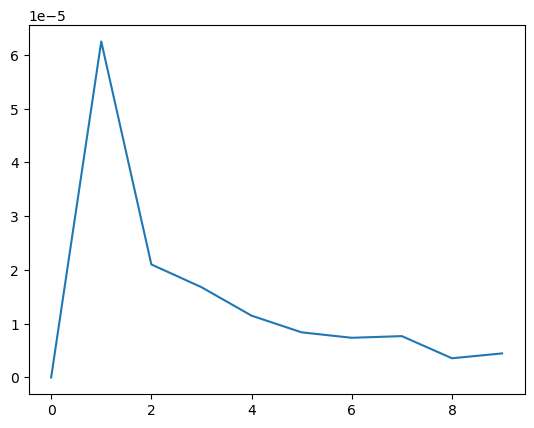

In [271]:
plt.plot(variances[:,1])

Can note the variances seems to be exponentially decreasing over time n

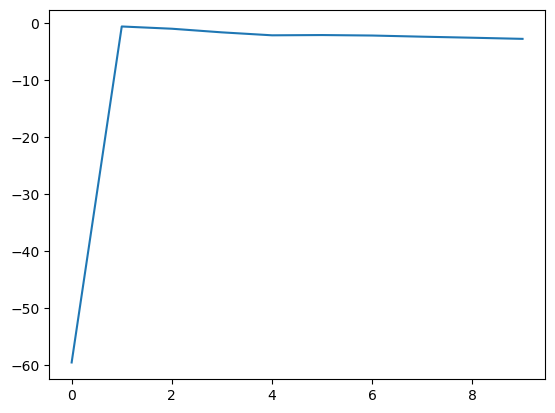

In [272]:
plt.plot(np.log(variances[:,0]))

In [273]:
res2=[]
for i in range(20):
    res2.append(samp(100,i*5,data).var(axis=0))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


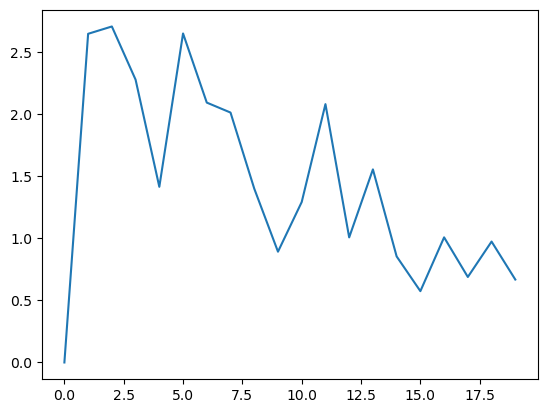

In [274]:
variances2=np.array(res2)
plt.plot(variances2[:,0])

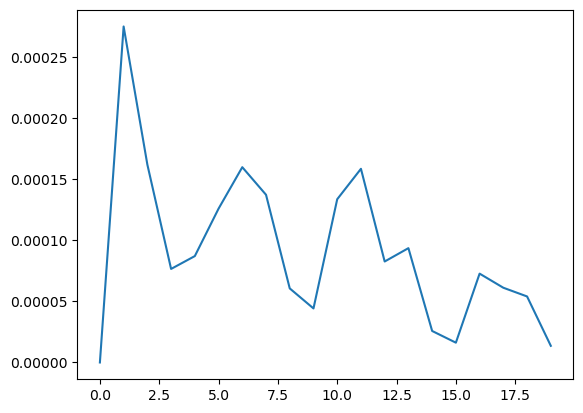

In [275]:
plt.plot(variances2[:,1])

## Question 7

Repeating the same thing but with letting it run for $M$ cycles first and setting the result as the initial state

In [299]:
sampler=FootPost(data)

In [291]:
sampler.cycle(1000)

In [325]:
def samp(N,size,data,sampler=None):
    res=np.zeros((N,2))
    for i in range(N):
        samples=sampler.sample(size)
        res[i,0]=samples.mean(axis=0)[1]
        boo=(samples[:,0]<samples[:,1])
        res[i,1]=boo.sum()/len(boo)
    return res

In [295]:
rc=[]
for i in range(10):
    rc.append(samp(100,i*100,data,sampler).var(axis=0))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [300]:
sampler.cycle(100)

In [301]:
rc2=[]
for i in range(10):
    rc2.append(samp(100,i*100,data,sampler).var(axis=0))
    print(i)

0
1
2
3
4
5
6
7
8
9


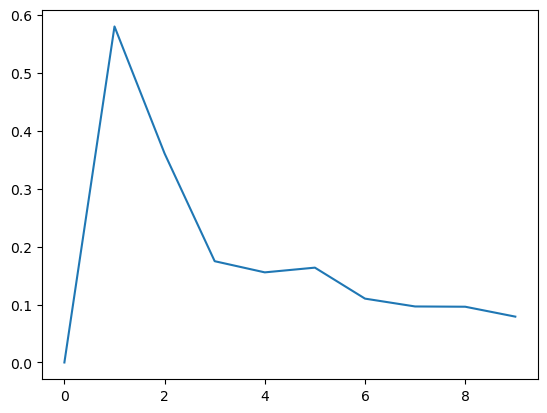

In [302]:
plt.plot(np.array(rc2)[:,0])

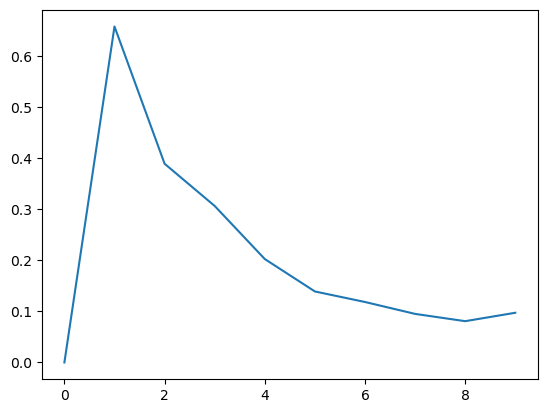

In [304]:
plt.plot(np.array(rc)[:,0])

The general shape is still the same, since for small N the result is the sample variance of a small sample. In theory it should be a slight improvement since initial state could have been chosen to be non typical. However in the initial state were generated from the invariant distribution it would provide no change a tall.

### Question 8
Experimenting with starting points

In [336]:
start=np.random.gamma(20,1029)
sampler=FootPost(data, start)

In [329]:
res=[]
for i in range(10):
    res.append(samp(100,i*100,data,sampler).var(axis=0))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [330]:
res2=[]
for i in range(20):
    res2.append(samp(100,i*5,data,sampler).var(axis=0))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


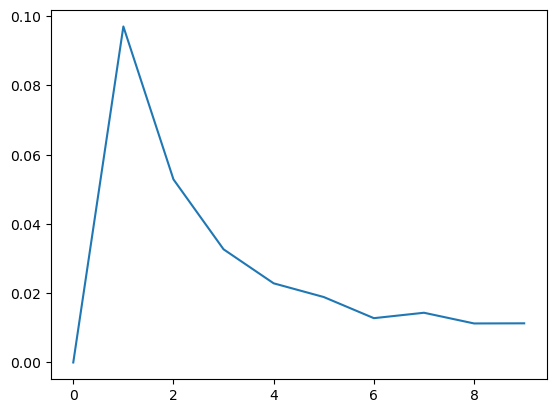

In [331]:
plt.plot(np.array(res)[:,0])

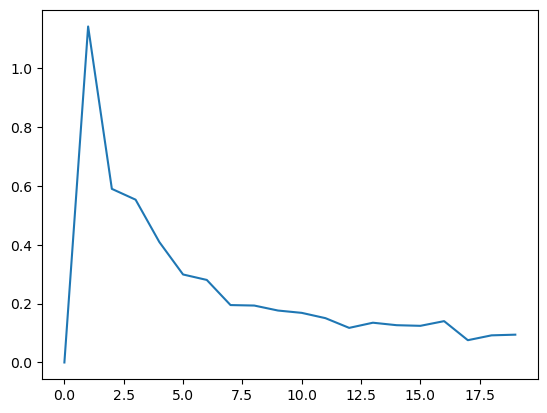

In [332]:
plt.plot(np.array(res2)[:,0])

Can see for example that the variance is much higher here, also expect then that pre-computing helps:

In [338]:
sampler.cycle(1000)

0
1
2
3
4
5
6
7
8
9


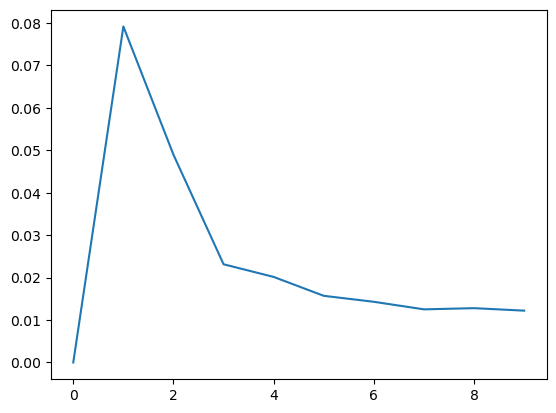

In [339]:
rc=[]
for i in range(10):
    rc.append(samp(100,i*100,data,sampler).var(axis=0))
    print(i)
plt.plot(np.array(rc)[:,0])

In [340]:
sampler.x0

array([5.94404620e+01, 7.97976932e+01, 5.06650618e+01, 5.06569832e+01,
       4.05941269e+01, 4.81017310e+01, 8.86812592e+01, 4.28242395e+01,
       5.15075854e+01, 4.82464179e+01, 7.31676153e+01, 5.12246961e+01,
       5.80924746e+01, 5.09271550e+01, 5.32360143e+01, 6.48409654e-02,
       5.20791242e-02, 8.48248863e-03, 5.18675230e-03, 1.06497717e-01,
       5.46609273e-03, 8.65583032e-04, 4.67023951e-02, 3.24069814e-03,
       4.38524091e-02, 4.42718473e-02, 1.77986559e-02, 2.28654969e-02,
       4.77489256e-02])

Perhaps an easy way to note this is to observe that $\Gamma(n/2, \lambda) \sim (2\lambda)^{-1}\chi^2_n$, and thus we have that $\sigma^{-2}_{k} \sim (2\lambda(y,\mu_{k}))^{-1}\chi^2_n$ for a fixed $n$. $(2\lambda(y,\mu_{k})$ will be a value here that is intuitively roughly equal to $\alpha_0$ plus the sample variance as given by $y_{k,.}$ and $\mu_k$. As a result if the initial states are chosen such that the $y_{k,.}$ are spread far away from $\mu_k$, then $\sigma^{2}_{k}$ will be very large which in turn also causes the next generation of $\mu_{k}$ to have a large spread. 
